In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Movie Rating Prediction/Train/Train.csv")
dataset.shape

(40000, 2)

In [3]:
dataset['label'].value_counts()

pos    20011
neg    19989
Name: label, dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
y = dataset['label'].values
y = le.fit_transform(y)
y[:100]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [6]:
dataset['review']

0        mature intelligent and highly charged melodram...
1        http://video.google.com/videoplay?docid=211772...
2        Title: Opera (1987) Director: Dario Argento Ca...
3        I think a lot of people just wrote this off as...
4        This is a story of two dogs and a cat looking ...
                               ...                        
39995    There are similarities between Ray Lawrence's ...
39996    For starters, I once met the director when he ...
39997    Much of "Over Her Dead Body" is so painfully u...
39998    "Lifeforce" is a truly bizarre adaptation of t...
39999    I saw this movie at a screener and its the bes...
Name: review, Length: 40000, dtype: object

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [0]:
sw = set(stopwords.words('english'))
ps = PorterStemmer()

In [0]:
def clean_text(sample):
  sample = sample.lower()
  sample = sample.replace("<br /><br />", "")
  sample = re.sub("[^a-zA-Z]+"," ",sample)
  sample = sample.split()

  sample = [ps.stem(s) for s in sample if s not in sw] # Removing stop words and doing stemming
  sample = " ".join(sample)

  return sample

In [11]:
dataset['review'][6]

"I'm only going to write more because it's required. However, the summary I put at the top is way too wordy for what this film was. You pretty much know who's in on it from the beginning. In spite of its attempts at plot twists and turns -acting 'talent' trying hard to have looks of shock and dismay when a twist happens-, you never really need to wonder 'whodunit' in this 'mystery'.<br /><br />The more I write, the more I feel bad that I have to write so much in order to have a comment, but rules are rules. I really feel bad about saying this, but this is the lowest I've ever rated a movie... I think. It makes me wonder what I'm saving votes of 1 and 2 for. However, I thought this film deserved a 3, since I believe there was some talent in the film. Johanna Watts (or is it Watson) did a pretty good job. She was crying and distraught in one part and I thought she conveyed that emotion well. The man who played the character that was 'the drummer' did well, too, for his short part.<br /><

In [12]:
clean_text(dataset['review'][6])

'go write requir howev summari put top way wordi film pretti much know begin spite attempt plot twist turn act talent tri hard look shock dismay twist happen never realli need wonder whodunit mysteri write feel bad write much order comment rule rule realli feel bad say lowest ever rate movi think make wonder save vote howev thought film deserv sinc believ talent film johanna watt watson pretti good job cri distraught one part thought convey emot well man play charact drummer well short part mani actor ok job lead actor david forget last name terribl name pretti bad think must thought dramat display young restless day live tri pictur white lab coat play doctor multipl person gener hospit help movi even shot like daytim soap although pretti sure could shoot movi camcord though without obviou soap ish sound edit first time ever thought money rent movi wast though watch unless paid larg sum money'

In [0]:
dataset['cleaned_review'] = dataset['review'].apply(clean_text)

In [0]:
corpus = dataset['cleaned_review'].values

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [0]:
cv = CountVectorizer(max_df = 0.5,max_features=50000)
X = cv.fit_transform(corpus)

In [17]:
print(X[0])

  (0, 25164)	1
  (0, 20844)	1
  (0, 19380)	1
  (0, 5614)	1
  (0, 25586)	1
  (0, 44630)	1
  (0, 5865)	1
  (0, 47635)	2
  (0, 39858)	2
  (0, 29479)	1
  (0, 24065)	1
  (0, 43631)	1
  (0, 36914)	1
  (0, 35377)	1
  (0, 24500)	1
  (0, 41060)	1


In [0]:
tfidf = TfidfTransformer()
x = tfidf.fit_transform(X)

In [19]:
print(x[0])

  (0, 47635)	0.6321513717388632
  (0, 44630)	0.3746519680247996
  (0, 43631)	0.23311910175629735
  (0, 41060)	0.08954711515364625
  (0, 39858)	0.3479272455598334
  (0, 36914)	0.12838776347304318
  (0, 35377)	0.06795826262376209
  (0, 29479)	0.09772985843350443
  (0, 25586)	0.20294441928431647
  (0, 25164)	0.19660242704458164
  (0, 24500)	0.1861194711304735
  (0, 24065)	0.08393204950822558
  (0, 20844)	0.1534465249461136
  (0, 19380)	0.14306353810192265
  (0, 5865)	0.21267493705986773
  (0, 5614)	0.18757256999458938


In [20]:
print(X.shape)
print(y.shape)

(40000, 50000)
(40000,)


### Neural Network

In [21]:
from keras import models
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
model = models.Sequential()
model.add(Dense(16, activation="relu", input_shape = (x.shape[1],) ) )
model.add(Dense(16, activation="relu") )
model.add(Dense(1, activation="sigmoid"))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                800016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 800,305
Trainable params: 800,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=['accuracy'])

In [0]:
x_val = X[:5000]
x_train = X[5000:]

y_val = y[:5000]
y_train = y[5000:]

In [26]:
x_train.shape, y_train.shape

((35000, 50000), (35000,))

In [27]:
hist = model.fit(x, y, batch_size=128, epochs=2, validation_data=(x_val, y_val))

Train on 40000 samples, validate on 5000 samples
Epoch 1/2
40000/40000 [==============================] - 16s 410us/step - loss: 0.4166 - accuracy: 0.8502 - val_loss: 1.4058 - val_accuracy: 0.9038
Epoch 2/2
40000/40000 [==============================] - 16s 409us/step - loss: 0.2052 - accuracy: 0.9190 - val_loss: 1.6208 - val_accuracy: 0.9130


In [0]:
result = hist.history

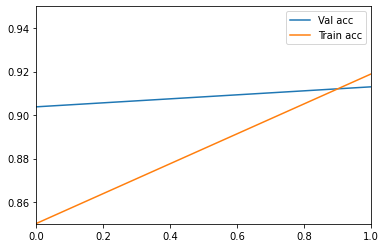

In [29]:
plt.xlim(0.0,1.0)
plt.ylim(0.85,0.95)
plt.plot(result['val_accuracy'], label = "Val acc")
plt.plot(result['accuracy'], label = "Train acc")
plt.legend()
plt.show()

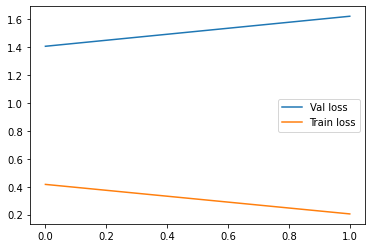

In [30]:
plt.plot(result['val_loss'], label = "Val loss")
plt.plot(result['loss'], label = "Train loss")
plt.legend()
plt.show()

In [31]:
model.evaluate(x_val,y_val)

5000/5000 [==============================] - 1s 255us/step


[1.6208250807206355, 0.9129999876022339]

### Testing Time

In [32]:
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Movie Rating Prediction/Test/Test.csv")
test.shape

(10000, 1)

In [33]:
test.head()

,review
0,Remember those old kung fu movies we used to w...
1,This movie is another one on my List of Movies...
2,How in the world does a thing like this get in...
3,"""Queen of the Damned"" is one of the best vampi..."
4,The Caprica episode (S01E01) is well done as a...


In [34]:
test['cleaned_review'] = test['review'].apply(clean_text)
x_test = test['cleaned_review']
x_test = cv.transform(x_test)
x_test.shape

(10000, 50000)

In [0]:
x_test = tfidf.transform(x_test)

In [0]:
y_pred = model.predict(x_test)
y_pred[ y_pred >= 0.5 ]  =  1
y_pred = y_pred.astype('int')

In [37]:
y_pred[:10]

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]])